# Shuffle and hyperparameters Tuning for hearing data set [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [111]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics, preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# load the dataset

In [112]:
path='C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/clearbandfeatures.xlsx'
dataset=pd.read_excel(path,header=None)
#dataset =pd.read_csv(path) # This is the csv read
#dataset

In [113]:
#sns.lmplot('dia','eccen',data=dataset,hue='class',palette='Set1',fit_reg=False,scatter_kws={"s":70})

# split the data set

In [114]:
X=dataset.iloc[:,16:21].values;# theta:1-6, alpha=6-11, beta=11-16: gamma=16-21 
X_scaled = preprocessing.scale(X)
y=dataset.iloc[:,0].values

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.20, random_state=42)     

# see the shape of the traing and test data set

In [133]:
#X_train.shape, y_train.shape
X_test.shape, y_test.shape   

((7L, 5L), (7L,))

In [134]:
X_test,y_test

(array([[ 0.51817109,  0.20800232, -0.29273979,  0.34020518,  0.92324867],
        [-0.95494315, -0.80238699, -0.77151922, -0.80209198, -1.37769005],
        [-0.59034063, -0.35838904, -0.7710778 , -1.23392219, -0.56986871],
        [-1.1519505 , -0.78676571, -0.69911303, -1.15769578, -1.33896834],
        [ 0.20434339,  0.24119045,  0.91246862,  0.4841884 ,  0.38968528],
        [-0.7109363 ,  0.22159338, -0.30187778, -0.06195718, -0.18965088],
        [-1.16664558, -0.69631526, -0.8776487 , -1.37884575, -1.14078874]]),
 array([1, 0, 1, 1, 0, 0, 0], dtype=int64))

# Find the Class labels

In [135]:
np.unique(y_test)

array([0, 1], dtype=int64)

# Find the repeated class number 

In [136]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([4, 3], dtype=int64))

# Gridserach CV

In [137]:
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002,]}
svc = svm.SVC()
cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=42)
#parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.002]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

# Find the best parameters  

In [138]:
accf= clf.cv_results_['mean_test_score']
accf

array([ 0.6 ,  0.68,  0.68,  0.68,  0.6 ,  0.68,  0.68,  0.68,  0.76,
        0.68,  0.68,  0.68,  0.76,  0.68,  0.68,  0.68,  0.68,  0.64,
        0.68,  0.56,  0.68,  0.68,  0.68,  0.68,  0.6 ,  0.44,  0.68,
        0.72,  0.6 ,  0.72,  0.68,  0.68])

In [139]:
print("Accuracy:%0.3f (+/-%0.3f)" %(accf.mean(), accf.std()*2))

Accuracy:0.665 (+/-0.116)


In [140]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [141]:
pred=clf.best_estimator_.predict(X_test)
clf.score(X_test, y_test)  
print pred
print y_test

[1 1 1 1 1 0 1]
[1 0 1 1 0 0 0]


In [143]:
acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
print acc

0.571428571429


In [130]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[0, 3],
       [0, 4]])

In [131]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.57      1.00      0.73         4

avg / total       0.33      0.57      0.42         7



 # [ROC Curve](https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/)

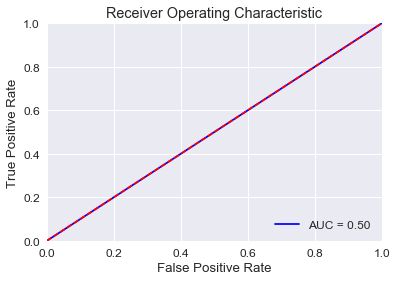

In [107]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
#false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(pred, y_test)
#print false_positive_rate
roc_auc = auc(false_positive_rate, true_positive_rate)
#print 'FPR=',false_positive_rate,'\n','TPR=',true_positive_rate
fig,ax1=plt.subplots(ncols=1)
ax1.plot(false_positive_rate, true_positive_rate, 'b-', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title('Receiver Operating Characteristic')

In [144]:
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002,0.003]}
svc = svm.SVC()
### Here is the leaveout
cn=0
pos=[1,6,11,16]; # This is the cluster number lhpos=[3,8,13,19],j=i+2 rhpos=[1,6,11,16], j=i+2
a=['Theta',"alpha",'beta', 'gamma']
for i in pos:
    j=i+5
    X=dataset.iloc[:,i:j].values;# theta:1-6, alpha=6-11, beta=11-16: gamma=16-21 # 1-3 RH, 3-5 LH
    #print X
    X_scaled = preprocessing.scale(X)
    y=dataset.iloc[:,0].values
    print X

[[  9.06223522e-14   4.13052207e-14   3.49543378e-14   1.29507635e-13
    1.90167299e-13]
 [  1.91301729e-13   6.04252057e-15   1.87265993e-14   2.22166746e-13
    3.21077555e-13]
 [  1.01700001e-13   8.79513244e-14   1.39494778e-14   1.84584360e-13
    2.36653976e-13]
 [  2.88316161e-13   1.71821184e-14   8.99605157e-14   3.49652362e-13
    6.85653652e-13]
 [  1.44947467e-13   1.55529076e-13   5.52340935e-14   1.43815248e-13
    3.17187222e-13]
 [  1.02959642e-13   4.82036826e-14   7.05027737e-14   5.32862187e-14
    1.70944814e-13]
 [  1.26006721e-13   1.50306678e-14   3.02918902e-13   4.89601654e-13
    3.92654927e-13]
 [  4.11273527e-14   2.85133411e-14   3.30432236e-14   3.11714366e-14
    2.33734788e-13]
 [  4.00634800e-14   3.36735592e-14   3.50304457e-14   4.76562140e-14
    1.08576032e-13]
 [  4.11981752e-14   6.74818774e-14   5.70241803e-14   6.87125041e-14
    1.29131645e-13]
 [  1.31264667e-13   7.47755555e-14   2.07249892e-14   1.22685734e-13
    3.14426130e-13]
 [  1.4771